In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
filepath = '/content/gdrive/MyDrive' + '/Colab Notebooks/csv/'

df_data = pd.read_csv(filepath + 'BostonHousing.csv')
print(df_data.shape)

Mounted at /content/gdrive
(506, 14)


In [2]:
bh_data = np.array(df_data.values, dtype=np.float32)
                            
x_train = np.array(bh_data[:400, :13], dtype=np.float32).reshape(-1, 13)       
y_train = np.array(bh_data[:400, 13], dtype=np.float32).reshape(-1, 1)

x_test = np.array(bh_data[400:, :13], dtype=np.float32).reshape(-1, 13)
y_test = np.array(bh_data[400:, 13], dtype=np.float32).reshape(-1, 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(400, 13) (400, 1) (106, 13) (106, 1)


In [3]:
def hypothesis(x, w, b):
 h = x.dot(w) + b
 return h

def MSE(y_pred, y_true):
 err = (y_pred - y_true) ** 2
 return np.mean(err)

In [4]:
w = np.random.rand(13)
b = np.random.rand()

print(w, b)

[0.17849262 0.75368752 0.50570372 0.25224917 0.53259342 0.65588826
 0.92918056 0.24744549 0.86531409 0.01992866 0.29310944 0.63565415
 0.29878182] 0.807378186293846


In [5]:
alpha = 6e-6
epoch = 16384

cost_list = []
for i in range(epoch):
    h = hypothesis(x_train, w, b)
    cost = MSE(h, y_train)

    for j in range(13):
        gradient = np.mean((h - y_train) * x_train[:, j])
        w[j] = w[j] - alpha * gradient

    gradient = np.mean((h - y_train))
    b = b - alpha * gradient
    cost_list.append(cost)

cost_list = np.array(cost_list)

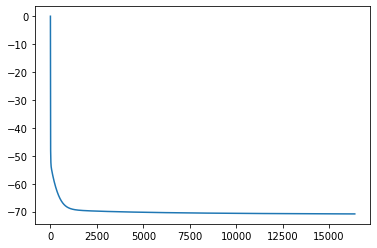

In [7]:
plt.plot(10.0 * np.log(cost_list / (np.max(cost_list) + 1e-5)))
plt.show()

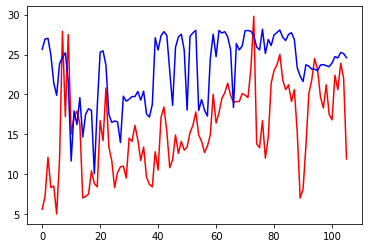

In [8]:
y_pred = hypothesis(x_test, w, b)

plt.plot(y_test, 'r')
plt.plot(y_pred, 'b')
plt.show()